# Iran Food Prices
##### *And effects of inflation and GDP*

## Introduction

"As of April 2022, food prices in Iran were up 43 percent over the previous year largely due to a severe drought, sanctions, inflation, corruption, and government mismanagement. In early May, the government implemented economic reforms intended to help consumers, but prices of bread and other staples spiked. Cooking essentials, such as oil and sugar, were increasingly scarce." -United States Institute of Peace [1].

In this assignment, I wanted to see how inflation rates and GDP (Gross domestic product) have impacted food prices in Iran from 2010 to 2020. The people of Iran are enduring one of the most inhumane and harshest regimes in history. With all the sanctions, mismanagements and incompetence of the government officials, prices, most notably food prices, have skyrocketed. The purchasing power of an average Iranian grows shorter each day [2].

## Methods
### Data Collection

Data for food prices is from [HDX](https://data.humdata.org/), an open platform for sharing data across crises and organisations [3].

Data for inflation and GDP  is from [World Bank Group](https://www.worldbank.org/en/home), one of the world's largest sources of funding and knowledge for developing countries [4], [5].

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('Iran_food_prices.csv')
gdp = pd.read_csv('GDP.csv')
inf = pd.read_csv('Inflation.csv')

### Data Cleaning

The dates in the dataset were in m/dd/yyyy format so I converted them to numerical data in order to use them for analyses.

In [3]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

I omitted the columns unrelated to the analyses as I only needed the values for inflation and GDP. I chose to keep the country code instead of the country name since it is shorter than the country name indicated in the file to make it less crowded.

In [4]:
inf = inf.drop(['Country Name', 'Indicator Name','Indicator Code'], axis=1)
gdp = gdp.drop(['Country Name', 'Indicator Name','Indicator Code'], axis=1)

To access the column easier I renamed both Country Code columns to just name.

In [5]:
inf.rename(columns = {'Country Code':'name'}, inplace = True)
gdp.rename(columns = {'Country Code':'name'}, inplace = True)

The years were all put into one column, and their values were separate to make it easier for analyses. Then renamed the columns for inflation and GDP values.

In [6]:
inf = inf.melt(id_vars='name', var_name="year").sort_values('name')
gdp = gdp.melt(id_vars='name', var_name="year").sort_values('name')

inf.rename(columns = {'value':'inflation'}, inplace = True)
gdp.rename(columns = {'value':'GDP'}, inplace = True)

## Analyses
I will explore how inflation and GDP have affected food prices in Iran from 2010 to 2020 with visualizations and statistical summaries.

## GDP and Inflation rates

The table below shows the rates of change over the ten years. Inflation rose from 2011 to 2013 and dropped till 2016, its lowest point. After that, it significantly grew by 123% in 2018, which continued till 2019, its highest point.

GDP rates were rising till 2012, its highest point, but after that, it continued to drop till 2016-2017, which had around 12% growth. However, GDP levels reached its lowest point in 2020. 

In [8]:
inf = inf[(inf.year >= '2010') & (inf.name == 'IRN')]
gdp = gdp[(gdp.year >= '2010') & (inf.name == 'IRN')]
merged = inf.merge(gdp)
merged = merged.dropna()
merged.GDP = merged.GDP.map(int)
merged = merged.sort_values(by = ['year'])
infRate = merged.inflation.pct_change() * 100
GDPRate = merged.GDP.pct_change() * 100

merged['Inflation rate of change %'] = infRate
merged['GDP rate of change %'] = GDPRate
merged.groupby(['year','Inflation rate of change %', 'GDP rate of change %']).size()

year  Inflation rate of change %  GDP rate of change %
2011   160.605014                  28.542094              1
2012   3.664142                    2.875399               1
2013   34.289493                  -23.447205              1
2014  -54.630667                  -6.693712               1
2015  -24.820754                  -11.304348              1
2016  -41.965476                   12.254902              1
2017   11.034533                   6.331878               1
2018   123.919051                 -32.032854              1
2019   121.533715                 -12.084592              1
2020  -23.337073                  -20.274914              1
dtype: int64

The figure below shows the mean of the Inflation rates and GDP.

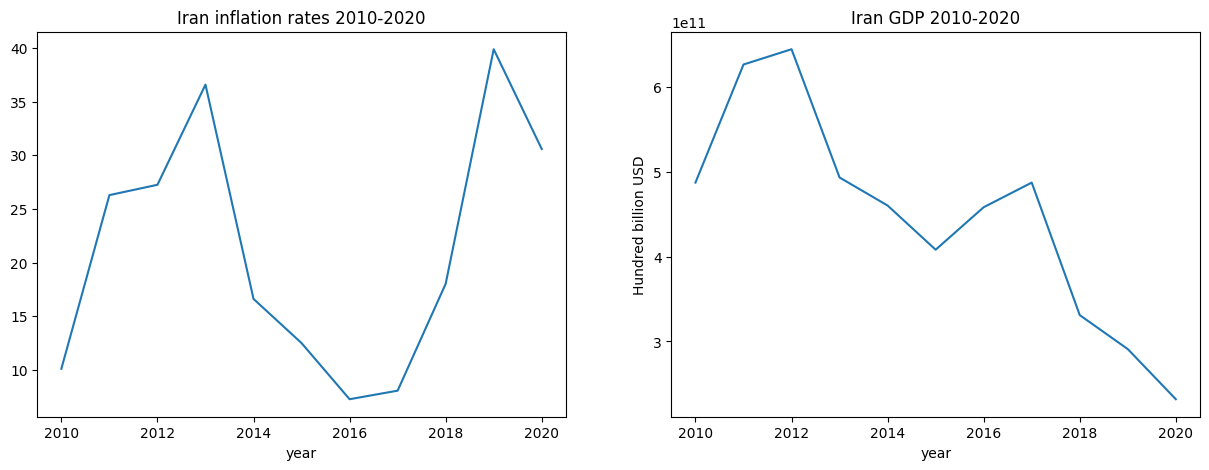

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(15, 5, forward=True)

merged.groupby(['year']).inflation.mean().plot(ax=axes[0], kind = 'line', title = 'Iran inflation rates 2010-2020')
merged.groupby(['year']).GDP.mean().plot(ax=axes[1], ylabel = 'Hundred billion USD', kind = 'line', title = 'Iran GDP 2010-2020');

## Prices

Prices were converted from Iranian rial to US dollars( 1 USD ~ 420000 IRR)

The figure below shows the difference in prices for each category. It is evident that the prices in 2022 are much higher than in 2012 due to inflation.

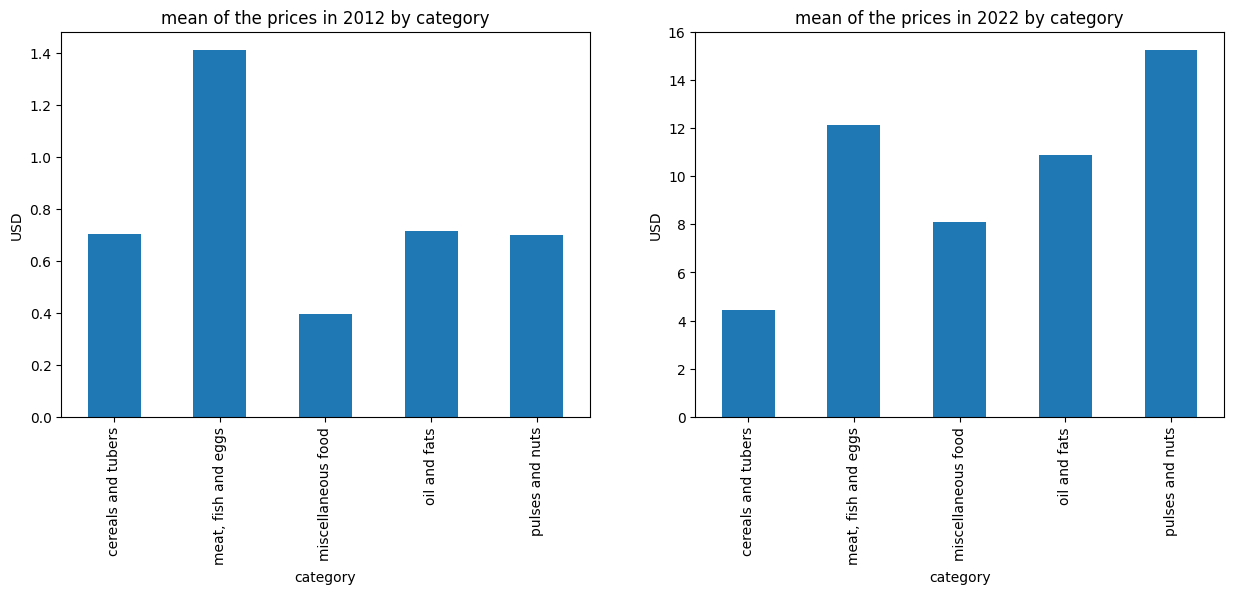

In [10]:
c = data[(data.category != 'milk and dairy') & (data.category != 'non-food') & (data.category != 'vegetables and fruits')]
y1 = c[(c.year == 2012)]
y2 = c[(c.year == 2022)]


fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(15, 5, forward=True)

y1.groupby(['category']).usdprice.mean().plot(ax=axes[0], ylabel = 'USD', kind = 'bar', title = 'mean of the prices in 2012 by category')
y2.groupby(['category']).usdprice.mean().plot(ax=axes[1], ylabel = 'USD', kind = 'bar', title = 'mean of the prices in 2022 by category');

The plot below shows the mean of the prices over ten years. It had a gradual growth, but after 2021 the change in prices was drastic, and the prices have risen significantly.

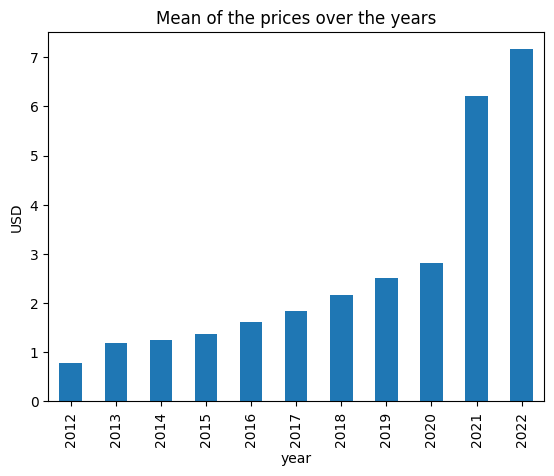

In [11]:
data.groupby(['year']).usdprice.mean().plot(ylabel = 'USD' ,kind = 'bar', title = 'Mean of the prices over the years');

## Discussion

In this assignment, I explored the relationship between inflation rates and GDP on food prices in Iran. While inflation rates have risen dramatically, the GDP continues to fall. In 2018, prices rose by 123% while GDP dropped by 23%. Another example would be the average cost of proteins (meat, fish and eggs) in 2012 was only 1.4 USD, while the same category was 12 USD in 2022. This suggests that food could soon become a luxury for many Iranians if GDP continues to fall.

## References
1. (2022). Explainer: Iran’s Protests Over Food Prices. United States Institute of Peace. - https://iranprimer.usip.org/blog/2022/jun/01/explainer-iran%E2%80%99s-protests-over-food-prices
2. (2022). Protests Triggered by Rising Food Prices Spread in Iran. The New York Times. https://www.nytimes.com/2022/05/13/world/iran-protests-food-prices.html
3. Source data for food prices - https://data.humdata.org/dataset/wfp-food-prices-for-iran-islamic-republic-of
4. Sourse data for inflation rates - https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=IR
5. Source data for GDP rates - https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=IR
6. Pandas for data manipulation
7. Matplotlib for data viz